## Exploratory Data analysis of shape, color and TGW(g) of the feature extraction files
### Author: Harpreet Kaur Bargota
### Date: Jan 2, 2026

### A. Analysis of Shape of faba bean seeds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.colors import CSS4_COLORS
import ast
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Load CSV or data
# df = pd.read_csv(r"C:\Users\bargotah\Downloads\output_nov27\FE_Color.csv")
df = pd.read_csv(r"../../Output/output_FE_all/FE_Color.csv")

# Check for missing values
print(df.isnull().sum())

# Inspect data types
print(df.info())


Seed No. per image            0
Class                         0
Area-SAM(mm2)                 0
Length-SAM(mm)                0
Width-SAM(mm)                 0
Perimeter-SAM(mm)             0
Area-SAM_taubin(mm2)          0
Length-SAM_taubin(mm)         0
Width-SAM_taubin(mm)          0
Perimeter-SAM_taubin(mm)      0
Area-SAM_minEnc(mm2)          0
Length-SAM_minEnc(mm)         0
Width-SAM_minEnc(mm)          0
Perimeter-SAM_minEnc(mm)      0
centroid-0                    0
centroid-1                    0
bbox-0                        0
bbox-1                        0
bbox-2                        0
bbox-3                        0
Area-SAM(pix)                 0
Eccentricity                  0
Equivalent diameter area      0
Perimeter(pix)                0
solidity                      0
area_convex                   0
extent                        0
Axis Major Length-SAM(pix)    0
Axis Minor Length-SAM(pix)    0
Aspect Ratio                  0
Roundness                     0
Compactn

In [3]:
df.describe()

,Seed No. per image,Area-SAM(mm2),Length-SAM(mm),Width-SAM(mm),Perimeter-SAM(mm),Area-SAM_taubin(mm2),Length-SAM_taubin(mm),Width-SAM_taubin(mm),Perimeter-SAM_taubin(mm),Area-SAM_minEnc(mm2),...,Axis Minor Length-SAM(pix),Aspect Ratio,Roundness,Compactness,Circularity-SAM,Shapefactor1,Shapefactor2,Shapefactor3,Shapefactor4,TGW(g)
count,4234.000000,4.234000e+03,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,...,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000
mean,3.798063,4.717932e+04,34.907821,25.810823,128.043145,137.099198,15.014973,10.926372,43.436821,125.689306,...,263.270709,1.370416,0.855362,0.855259,1.169737,0.005238,0.003856,0.732944,0.996311,752.634404
std,2.757476,7.485736e+05,316.578991,218.418876,1366.315034,72.724844,4.205587,2.799119,11.660015,66.120375,...,65.740804,0.124762,0.019831,0.038413,0.027751,0.004834,0.002894,0.065716,0.003073,385.729255
min,0.000000,3.618402e-02,0.283743,0.167759,0.627266,0.036283,0.287190,0.166223,0.663751,0.035097,...,4.275112,1.025826,0.715092,0.700259,0.966274,0.002346,0.001821,0.490363,0.967720,116.538420
25%,1.000000,8.054105e+01,11.290775,9.119410,32.367539,80.616983,11.755094,8.796541,34.327037,74.516146,...,212.100724,1.283832,0.844505,0.829591,1.150949,0.004168,0.002987,0.688221,0.995286,454.953843
50%,3.000000,1.230665e+02,14.148918,11.150687,40.090990,123.145073,14.757108,10.692577,42.502995,112.885208,...,257.649486,1.364269,0.857689,0.854849,1.165924,0.004960,0.003598,0.730767,0.997172,676.285054
75%,6.000000,1.759325e+02,16.927856,13.325088,47.986708,174.922910,17.690136,12.683335,50.860468,159.690267,...,306.611530,1.448423,0.868848,0.880878,1.184126,0.006023,0.004495,0.775946,0.998328,953.643014
max,10.000000,1.698393e+07,6229.450376,4552.191200,28058.153417,458.144867,29.476667,22.482575,81.846152,421.472858,...,545.682978,2.012760,1.034903,0.984079,1.398421,0.307761,0.178130,0.968412,0.999891,2469.643864


In [4]:
#removing the artifacts
data = df[df['Area-SAM(mm2)'] >= 5]
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4233 entries, 0 to 4233
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Seed No. per image          4233 non-null   int64  
 1   Class                       4233 non-null   object 
 2   Area-SAM(mm2)               4233 non-null   float64
 3   Length-SAM(mm)              4233 non-null   float64
 4   Width-SAM(mm)               4233 non-null   float64
 5   Perimeter-SAM(mm)           4233 non-null   float64
 6   Area-SAM_taubin(mm2)        4233 non-null   float64
 7   Length-SAM_taubin(mm)       4233 non-null   float64
 8   Width-SAM_taubin(mm)        4233 non-null   float64
 9   Perimeter-SAM_taubin(mm)    4233 non-null   float64
 10  Area-SAM_minEnc(mm2)        4233 non-null   float64
 11  Length-SAM_minEnc(mm)       4233 non-null   float64
 12  Width-SAM_minEnc(mm)        4233 non-null   float64
 13  Perimeter-SAM_minEnc(mm)    4233 non-n

### Distribution of shape factors

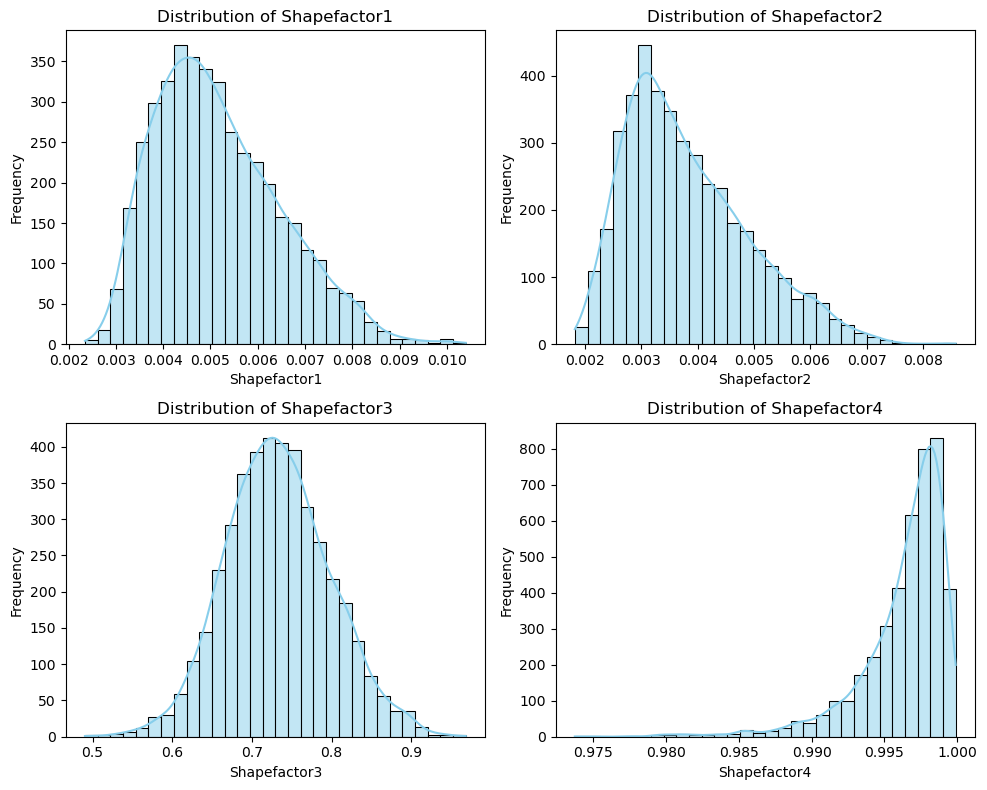

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes = axes.flatten()

shapefactors=data[['Shapefactor1', 'Shapefactor2', 'Shapefactor3', 'Shapefactor4']]
for i, sf in enumerate(shapefactors):
    sns.histplot(data[sf], bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {sf}')
    axes[i].set_xlabel(sf)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig("shape_beans.jpg", format='jpg', dpi=600, bbox_inches='tight') 
plt.show()

### Distribution of shape of faba beans

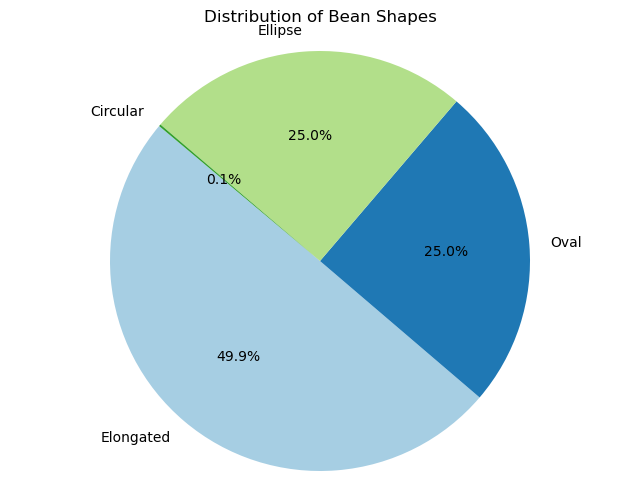

In [6]:
# Split each string by comma and flatten into a single list
all_shapes = [s.strip() for row in data['Shape'] for s in row.split(',')]

# Count occurrences of each unique shape
shape_counts = pd.Series(all_shapes).value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    shape_counts,
    labels=shape_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribution of Bean Shapes')
plt.axis('equal')  # Ensure pie is circular
plt.show()


### B. Color of Faba Bean seeds

In [7]:
selected_columns = ["Class", "RGB value of Seed", "color_seeds"]
df_subset = df[selected_columns]
df_subset.head(2)

,Class,RGB value of Seed,color_seeds
0,Faba-Seed-CC_Vf447-1-1,"[255, 247, 48]",yellow
1,Faba-Seed-CC_Vf447-1-1,"[247, 239, 40]",yellow


In [8]:
#function for determining the colo of bars in graph
def get_color(name):
    return CSS4_COLORS.get(name.lower(), '#333333')  # fallback to dark gray if name not found

bar_colors = [get_color(c) for c in df_subset['color_seeds']]

# Count of each color class
counts = df_subset['color_seeds'].value_counts()

In [9]:
counts

color_seeds
gold              1412
yellow             911
orange             619
black              413
goldenrod          263
darkorange         250
chocolate           71
yellowgreen         54
dimgray             43
darkgoldenrod       38
peru                33
darkslategray       31
olive               18
orangered           17
saddlebrown         16
darkturquoise       13
sienna               7
aqua                 6
rosybrown            5
firebrick            3
greenyellow          3
palevioletred        1
darksalmon           1
khaki                1
indianred            1
darkolivegreen       1
maroon               1
darkred              1
tan                  1
Name: count, dtype: int64

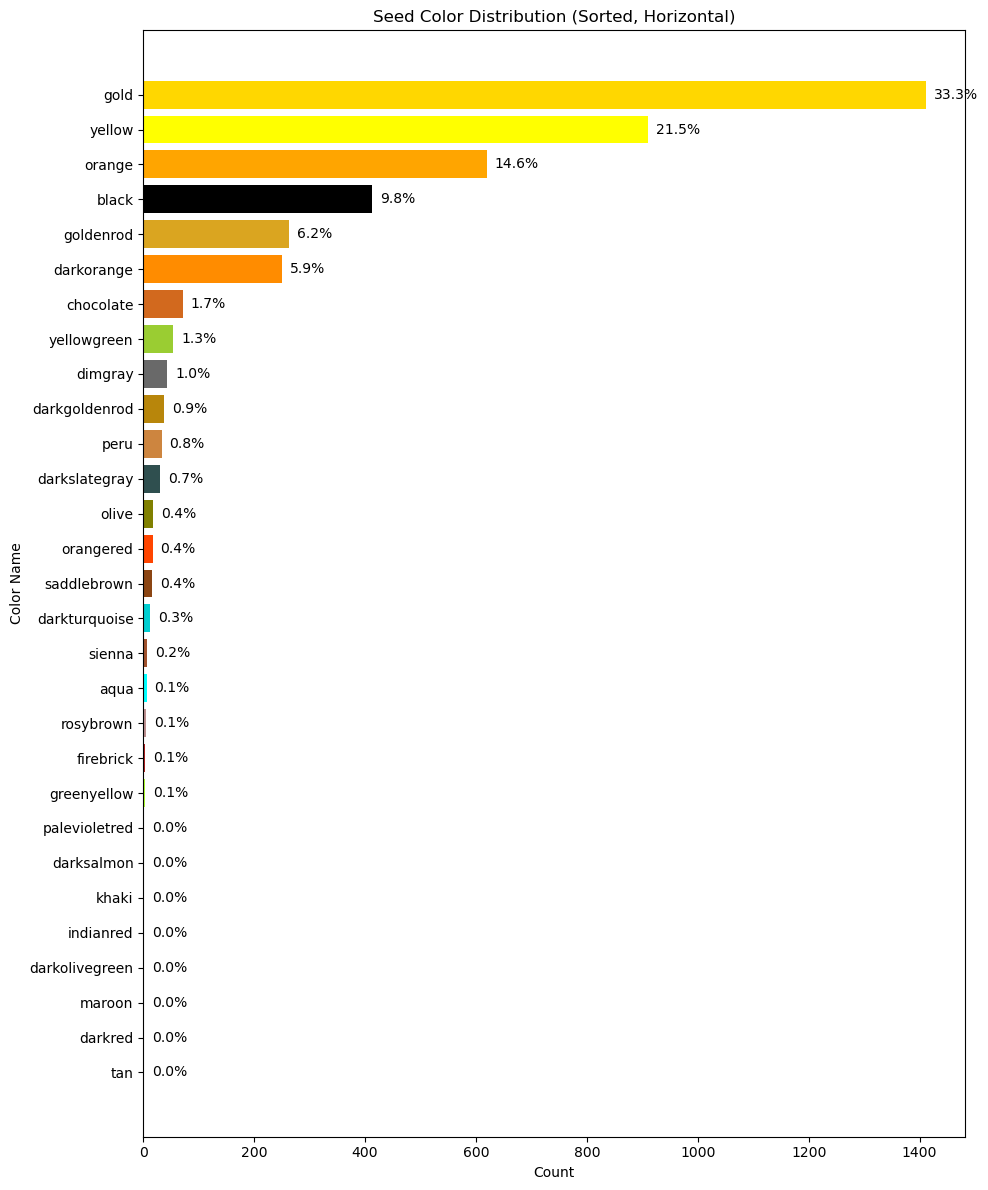

In [10]:
# Function to convert color name → HEX (with fallback)
def get_color(name):
    return CSS4_COLORS.get(name.lower(), '#333333')

# --- Sort counts in descending order ---
counts_sorted = counts.sort_values(ascending=False)

# Extract bar colors after sorting
bar_colors = [get_color(c) for c in counts_sorted.index]

# Total seeds (for % calculation)
total = counts_sorted.sum()

# --- Plot ---
plt.figure(figsize=(10, 12))
# plt.gca().set_facecolor("lightgrey")  # background color

plt.barh(counts_sorted.index, counts_sorted.values, color=bar_colors)

plt.ylabel("Color Name")
plt.xlabel("Count")
plt.title("Seed Color Distribution (Sorted, Horizontal)")

# Add % labels
for i, (count, color_name) in enumerate(zip(counts_sorted.values, counts_sorted.index)):
    pct = (count / total) * 100
    plt.text(count + max(counts_sorted.values) * 0.01,
             i,
             f"{pct:.1f}%",
             va='center')

plt.gca().invert_yaxis()   # largest at top
plt.tight_layout()
plt.show()


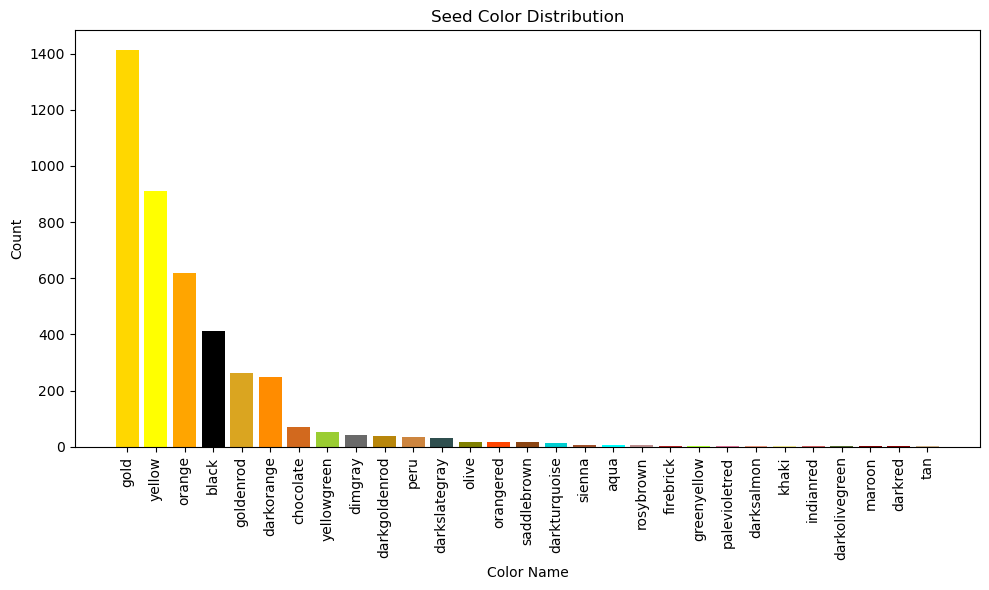

In [11]:
# Function to convert color name → HEX (with fallback)
def get_color(name):
    return CSS4_COLORS.get(name.lower(), '#333333')

# Extract bar colors by mapping index names (color names)
bar_colors = [get_color(c) for c in counts.index]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color=bar_colors)
plt.xlabel("Color Name")
plt.ylabel("Count")
plt.title("Seed Color Distribution")
plt.xticks(rotation=90)
plt.tight_layout()

# Save the figure as JPG
plt.savefig("seed_color_distribution.jpg", format='jpg', dpi=300)

# Display the plot
plt.show()


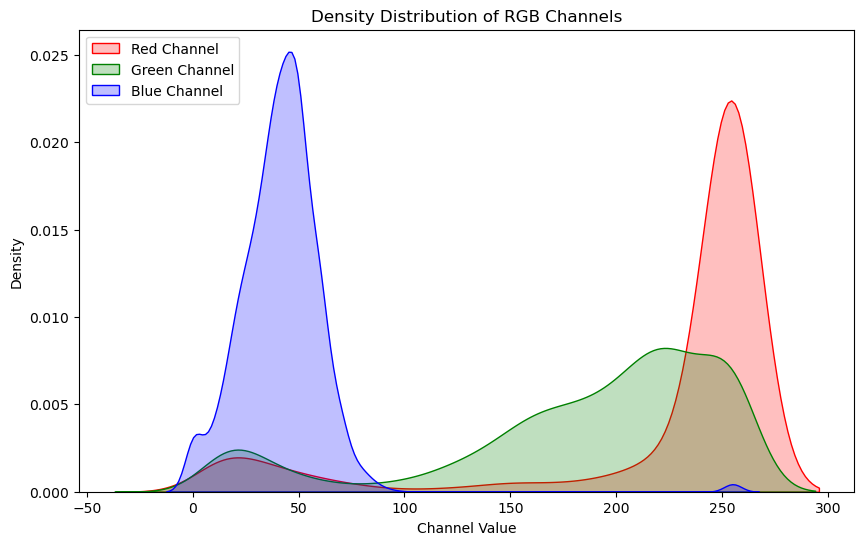

In [12]:
# Step 1: Convert the string '[R, G, B]' into a list
df_subset['RGB_list'] = df_subset['RGB value of Seed'].apply(ast.literal_eval)

# Step 2: Split into R, G, B columns
df_subset[['R', 'G', 'B']] = pd.DataFrame(df_subset['RGB_list'].tolist())

# Step 3: Plot density for each channel
plt.figure(figsize=(10, 6))
sns.kdeplot(df_subset['R'], color='red', label='Red Channel', fill=True)
sns.kdeplot(df_subset['G'], color='green', label='Green Channel', fill=True)
sns.kdeplot(df_subset['B'], color='blue', label='Blue Channel', fill=True)

plt.title('Density Distribution of RGB Channels')
plt.xlabel('Channel Value')
plt.ylabel('Density')
plt.legend()
# Save figure as JPG
plt.savefig("DD_rgb.jpg", format='jpg')
plt.show()


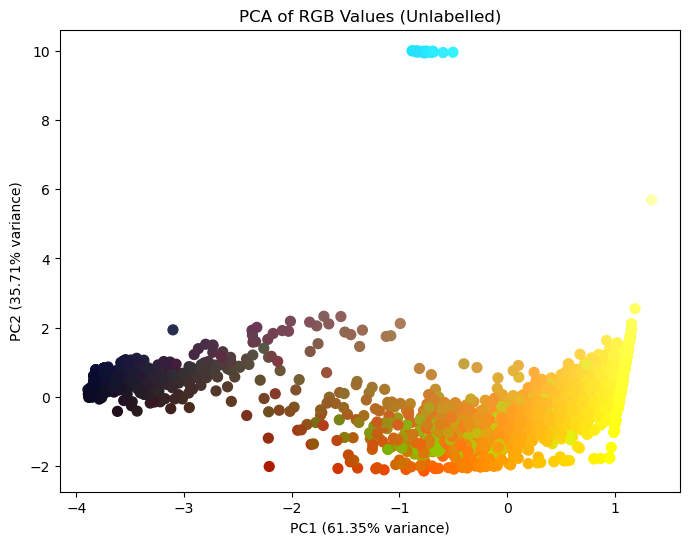

In [13]:
# Assuming df has columns 'R', 'G', 'B'
X = df_subset[['R', 'G', 'B']].values

# Standardize the RGB values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Plot PCA results
plt.figure(figsize=(8,6))
plt.scatter(
    pca_df['PC1'], 
    pca_df['PC2'], 
    c=df_subset[['R', 'G', 'B']].values / 255, 
    s=50
)

plt.title('PCA of RGB Values (Unlabelled)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')

# Remove background grid lines
plt.grid(False)

# Save figure as JPG
plt.savefig("pca_rgb.jpg", format='jpg', dpi=300, bbox_inches='tight')

plt.show()


Principal component analysis of the extracted RGB color values revealed clear patterns in seed coat color variation among the faba bean samples (Figure 10B). The first two principal components explained most of the variance in the dataset, with PC1 accounting for 61.34% and PC2 for 35.72%, indicating that these two axes effectively summarize the underlying color structure. When visualized in the PCA space, the seed colors formed a continuous gradient rather than discrete groups, reflecting smooth transitions in pigmentation across samples. A dense, curved distribution of points represented the main spectrum of seed coat colors, ranging from darker, more reddish–brown tones to lighter yellowish hues. In contrast, a distinct cluster positioned toward the upper region of the plot corresponded to seeds with higher green–blue channel intensities, suggesting a subgroup with noticeably different pigmentation characteristics. The combined density and scatter visualization highlights both the dominant continuum of color variation and the presence of a smaller, differentiated color class within the faba bean seed population. 

### EDA for TGW(g)

In [14]:
selected_columns = ["Class", "TGW(g)"]
df1 = df[selected_columns]

Shape of dataframe: (4234, 41)

Data types:
 Seed No. per image              int64
Class                          object
Area-SAM(mm2)                 float64
Length-SAM(mm)                float64
Width-SAM(mm)                 float64
Perimeter-SAM(mm)             float64
Area-SAM_taubin(mm2)          float64
Length-SAM_taubin(mm)         float64
Width-SAM_taubin(mm)          float64
Perimeter-SAM_taubin(mm)      float64
Area-SAM_minEnc(mm2)          float64
Length-SAM_minEnc(mm)         float64
Width-SAM_minEnc(mm)          float64
Perimeter-SAM_minEnc(mm)      float64
centroid-0                    float64
centroid-1                    float64
bbox-0                          int64
bbox-1                          int64
bbox-2                          int64
bbox-3                          int64
Area-SAM(pix)                 float64
Eccentricity                  float64
Equivalent diameter area      float64
Perimeter(pix)                float64
solidity                      float64
area_

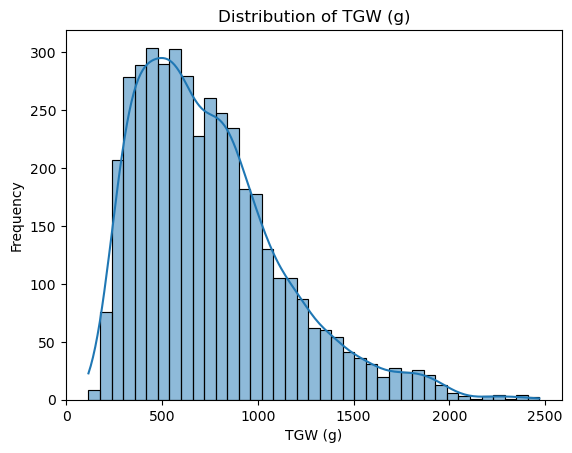

In [15]:
# -------------------------------
# Basic EDA
# -------------------------------
print("Shape of dataframe:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df['TGW(g)'].describe())

# -------------------------------
# Class distribution
# -------------------------------
print("\nSamples per class:\n", df['Class'].value_counts())

# -------------------------------
# TGW Distribution
# -------------------------------
plt.figure()
sns.histplot(df['TGW(g)'], kde=True)
plt.xlabel("TGW (g)")
plt.ylabel("Frequency")
plt.title("Distribution of TGW (g)")
plt.show()


In [16]:
# Minimum TGW
min_row = df.loc[df['TGW(g)'].idxmin()]
min_value = min_row['TGW(g)']
min_class = min_row['Class']

# Maximum TGW
max_row = df.loc[df['TGW(g)'].idxmax()]
max_value = max_row['TGW(g)']
max_class = max_row['Class']

print(f"Minimum TGW(g): {min_value:.3f}, Class: {min_class}")
print(f"Maximum TGW(g): {max_value:.3f}, Class: {max_class}")


Minimum TGW(g): 116.538, Class: Faba-Seed-CC_Vf117-1-2
Maximum TGW(g): 2469.644, Class: Faba-Seed-CC_Vf342-3-1


In [17]:
# Group by class and compute average TGW
df_class_avg = (
    df.groupby('Class', as_index=False)
      .agg(Avg_TGW_g=('TGW(g)', 'mean'),
           Min_TGW_g=('TGW(g)', 'min'),
           Max_TGW_g=('TGW(g)', 'max'),
           Count=('TGW(g)', 'count'))
)

print("\nClass-wise TGW statistics:\n")
print(df_class_avg)



Class-wise TGW statistics:

                      Class    Avg_TGW_g    Min_TGW_g    Max_TGW_g  Count
0      Faba-Seed-CC_Vf1-1-2  1222.509717  1037.747831  1333.757298      4
1    Faba-Seed-CC_Vf100-1-2   766.264947   572.347091  1060.393433     10
2    Faba-Seed-CC_Vf101-1-3   462.781193   325.041039   556.548805     10
3    Faba-Seed-CC_Vf102-1-3  1245.488156  1015.595969  1460.430067     10
4    Faba-Seed-CC_Vf103-1-2   311.483999   210.171615   375.519676     10
..                      ...          ...          ...          ...    ...
549   Faba-Seed-CC_Vf95-1-2   376.338089   233.819108   493.547261      6
550   Faba-Seed-CC_Vf96-1-2   406.829527   261.682123   500.415985     10
551   Faba-Seed-CC_Vf97-1-2   645.965302   522.339005   871.568339      6
552   Faba-Seed-CC_Vf98-1-2   592.784204   386.752391   696.276483      3
553   Faba-Seed-CC_Vf99-4-1   834.034738   550.541452  1037.437208     10

[554 rows x 5 columns]


In [18]:
# Minimum average TGW
min_avg_row = df_class_avg.loc[df_class_avg['Avg_TGW_g'].idxmin()]
min_avg_value = min_avg_row['Avg_TGW_g']
min_avg_class = min_avg_row['Class']

# Maximum average TGW
max_avg_row = df_class_avg.loc[df_class_avg['Avg_TGW_g'].idxmax()]
max_avg_value = max_avg_row['Avg_TGW_g']
max_avg_class = max_avg_row['Class']

print(f"\nMinimum Class Average TGW(g): {min_avg_value:.3f}, Class: {min_avg_class}")
print(f"Maximum Class Average TGW(g): {max_avg_value:.3f}, Class: {max_avg_class}")



Minimum Class Average TGW(g): 177.566, Class: Faba-Seed-CC_Vf62-1-1
Maximum Class Average TGW(g): 2232.477, Class: Faba-Seed-CC_Vf342-3-1


In [19]:
df_class_avg_sorted = df_class_avg.sort_values('Avg_TGW_g')

print("\nClass-wise TGW Summary (Sorted by Average):\n")
print(df_class_avg_sorted)



Class-wise TGW Summary (Sorted by Average):

                      Class    Avg_TGW_g    Min_TGW_g    Max_TGW_g  Count
497   Faba-Seed-CC_Vf62-1-1   177.566248   177.566248   177.566248      1
19   Faba-Seed-CC_Vf117-1-2   183.566457   116.538420   232.638871      9
548   Faba-Seed-CC_Vf94-1-2   192.480680   178.225879   212.007940      6
544   Faba-Seed-CC_Vf90-1-1   212.494998   142.379450   237.549774      6
339  Faba-Seed-CC_Vf460-1-1   224.409000   183.863386   264.825586      9
..                      ...          ...          ...          ...    ...
263  Faba-Seed-CC_Vf369-3-1  1853.197714  1394.575191  2352.088842     10
338   Faba-Seed-CC_Vf46-1-1  1873.802334  1246.265163  2441.240982      3
79   Faba-Seed-CC_Vf172-1-2  1907.582767  1907.582767  1907.582767      1
358  Faba-Seed-CC_Vf484-1-1  1952.161621  1743.716522  2252.185893      3
241  Faba-Seed-CC_Vf342-3-1  2232.476859  1815.601525  2469.643864      7

[554 rows x 5 columns]
